# Auswirkung der Abstandsmetrik auf das kNN

#### Importe

In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import r2_score as r2
from sklearn.metrics import max_error
import seaborn as sns

#### Default Datentyp Tensor

In [3]:
torch.set_default_dtype(torch.float64)

#### Laden des Train und Testloss über den Trainingsverlauf

In [4]:
# Standardisierungsdaten
loss_data_file_1 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_008_006.npz'
loss_data_1 = np.load(loss_data_file_1)
loss_data_file_2 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_008_005.npz'
loss_data_2 = np.load(loss_data_file_2)
loss_data_file_3 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_008_007.npz'
loss_data_3 = np.load(loss_data_file_3)

loss_1 = np.array(loss_data_1['mae']) # manhattan
loss_2 = np.array(loss_data_2['mae']) # euklidisch
loss_3 = np.array(loss_data_3['mae']) # minkowski
print(loss_1)

[0.17782243 0.14004804 0.12882864 0.1269382  0.12316861 0.12491287
 0.12456622 0.12492809 0.12489353 0.12675808 0.12695416 0.1279025
 0.12779772 0.12873248 0.13211077 0.13440195 0.13526907 0.1390496
 0.14053512 0.14353261 0.14575852 0.14846443 0.15120362 0.15211529
 0.15491309 0.15515235 0.15704122 0.15924448 0.16055009 0.1618977
 0.16290489 0.16416345 0.16613538 0.16781202 0.16911139 0.16910122
 0.17144697 0.17367615 0.17550406 0.17660485]


#### Importing Plot Stylesheet

In [5]:
plt.style.use(['seaborn-v0_8-paper',Path.cwd().parent / 'plotstyle' / 'paper.mplstyle'])
cm = 1/2.54

#### Plot loss vs epoch

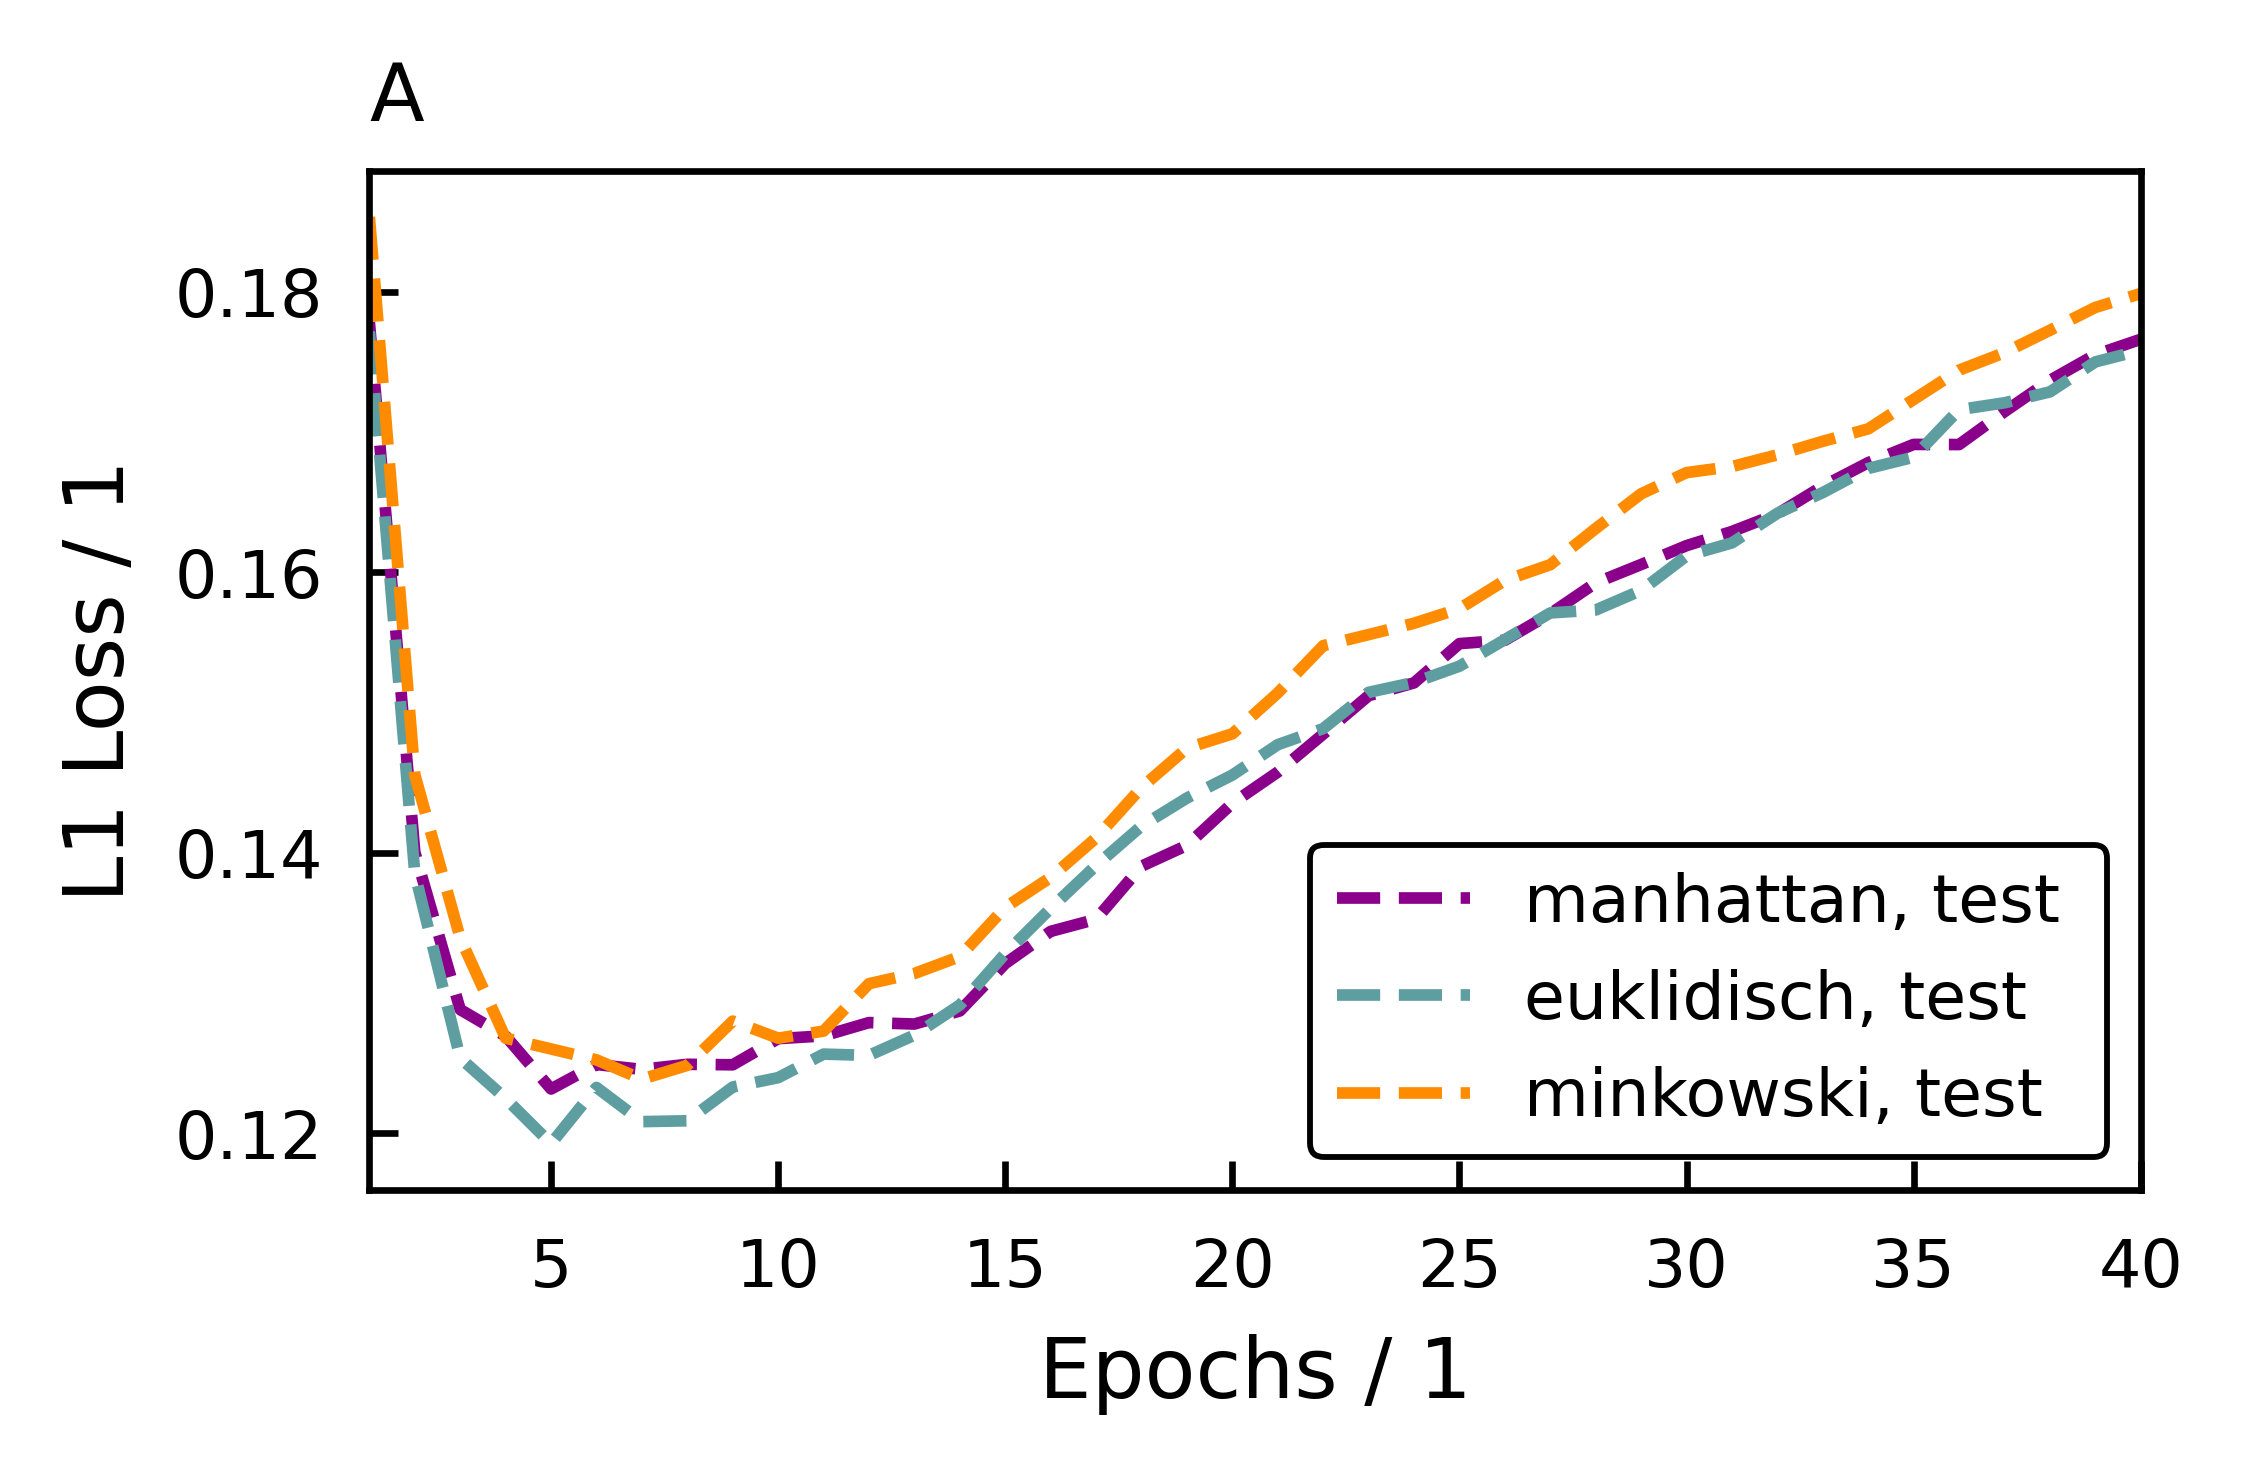

In [10]:
fig,ax = plt.subplots(figsize = (9.75*cm,6.5*cm))

ax.plot(np.linspace(1,40, 40),loss_1, '--', color = 'darkmagenta', label='manhattan, test ')
ax.plot(np.linspace(1,40, 40),loss_2, '--', color = 'cadetblue', label='euklidisch, test ')
ax.plot(np.linspace(1,40, 40),loss_3, '--', color = 'darkorange', label='minkowski, test ')

#plt.title("Train and Test Loss")
ax.set(xlabel = 'Epochs / 1', ylabel = 'L1 Loss / 1') #Beschriftung Achsen; Kursiv durch $$; Index durch _{}
#ax.set(xlim=(0,200))
ax.tick_params(direction = 'in') #, length = 20, width = 3)
ax.set_title('A', loc='left')
ax.set(xlim=(1,40))

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [11]:
#fig.savefig(Path.cwd().parent / 'plots/knn/TKA_SRA_PK_016_distancemeasure.png', bbox_inches = 'tight')